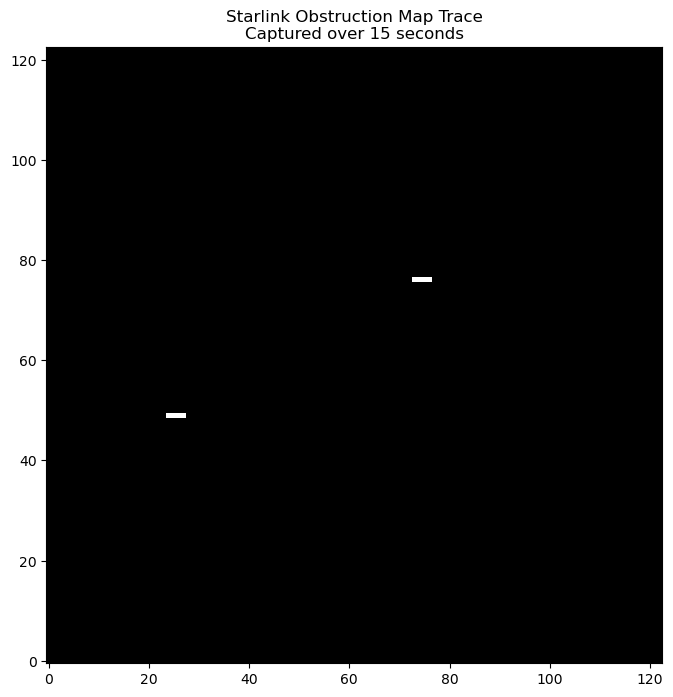

In [24]:
import sys
import os

# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:\SatInView/starlink-grpc-tools-main'))
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_trace(snapshots):
    plt.figure(figsize=(8, 8))
    base_image = np.zeros_like(snapshots[0])

    for snr_data in snapshots:
        base_image = np.maximum(base_image, snr_data)

    plt.imshow(base_image, cmap='gray', origin='lower')
    plt.title(f'Starlink Obstruction Map Trace\nCaptured over {duration_seconds} seconds')
    plt.show()

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target
starlink_grpc.reset_obstruction_map(context)
# Define the duration and interval for capturing the data
duration_seconds = 15
interval_seconds = 1  # Capture a snapshot every 1 second

# Capture the SNR data over the specified duration
snapshots = capture_snr_data(duration_seconds, interval_seconds, context)

# Plot the trace of the SNR data
plot_snr_trace(snapshots)

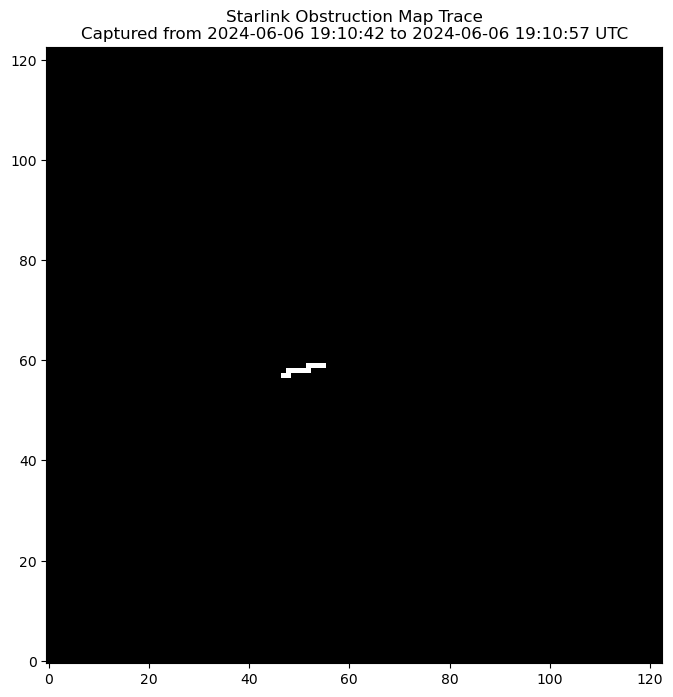

In [30]:
import sys
import os
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:\\SatInView\\starlink-grpc-tools-main'))

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_trace(snapshots, start_time, end_time):
    plt.figure(figsize=(8, 8))
    base_image = np.zeros_like(snapshots[0])

    for snr_data in snapshots:
        base_image = np.maximum(base_image, snr_data)

    plt.imshow(base_image, cmap='gray', origin='lower')
    plt.title(f'Starlink Obstruction Map Trace\nCaptured from {start_time} to {end_time} UTC')
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

# Wait until the current second matches one of the target times
wait_until_target_time()

starlink_grpc.reset_obstruction_map(context)

# Define the duration and interval for capturing the data
duration_seconds = 15
interval_seconds = 1  # Capture a snapshot every 1 second

# Capture the start time
start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

# Capture the SNR data over the specified duration
snapshots = capture_snr_data(duration_seconds, interval_seconds, context)

# Capture the end time
end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

# Plot the trace of the SNR data
plot_snr_trace(snapshots, start_time, end_time)


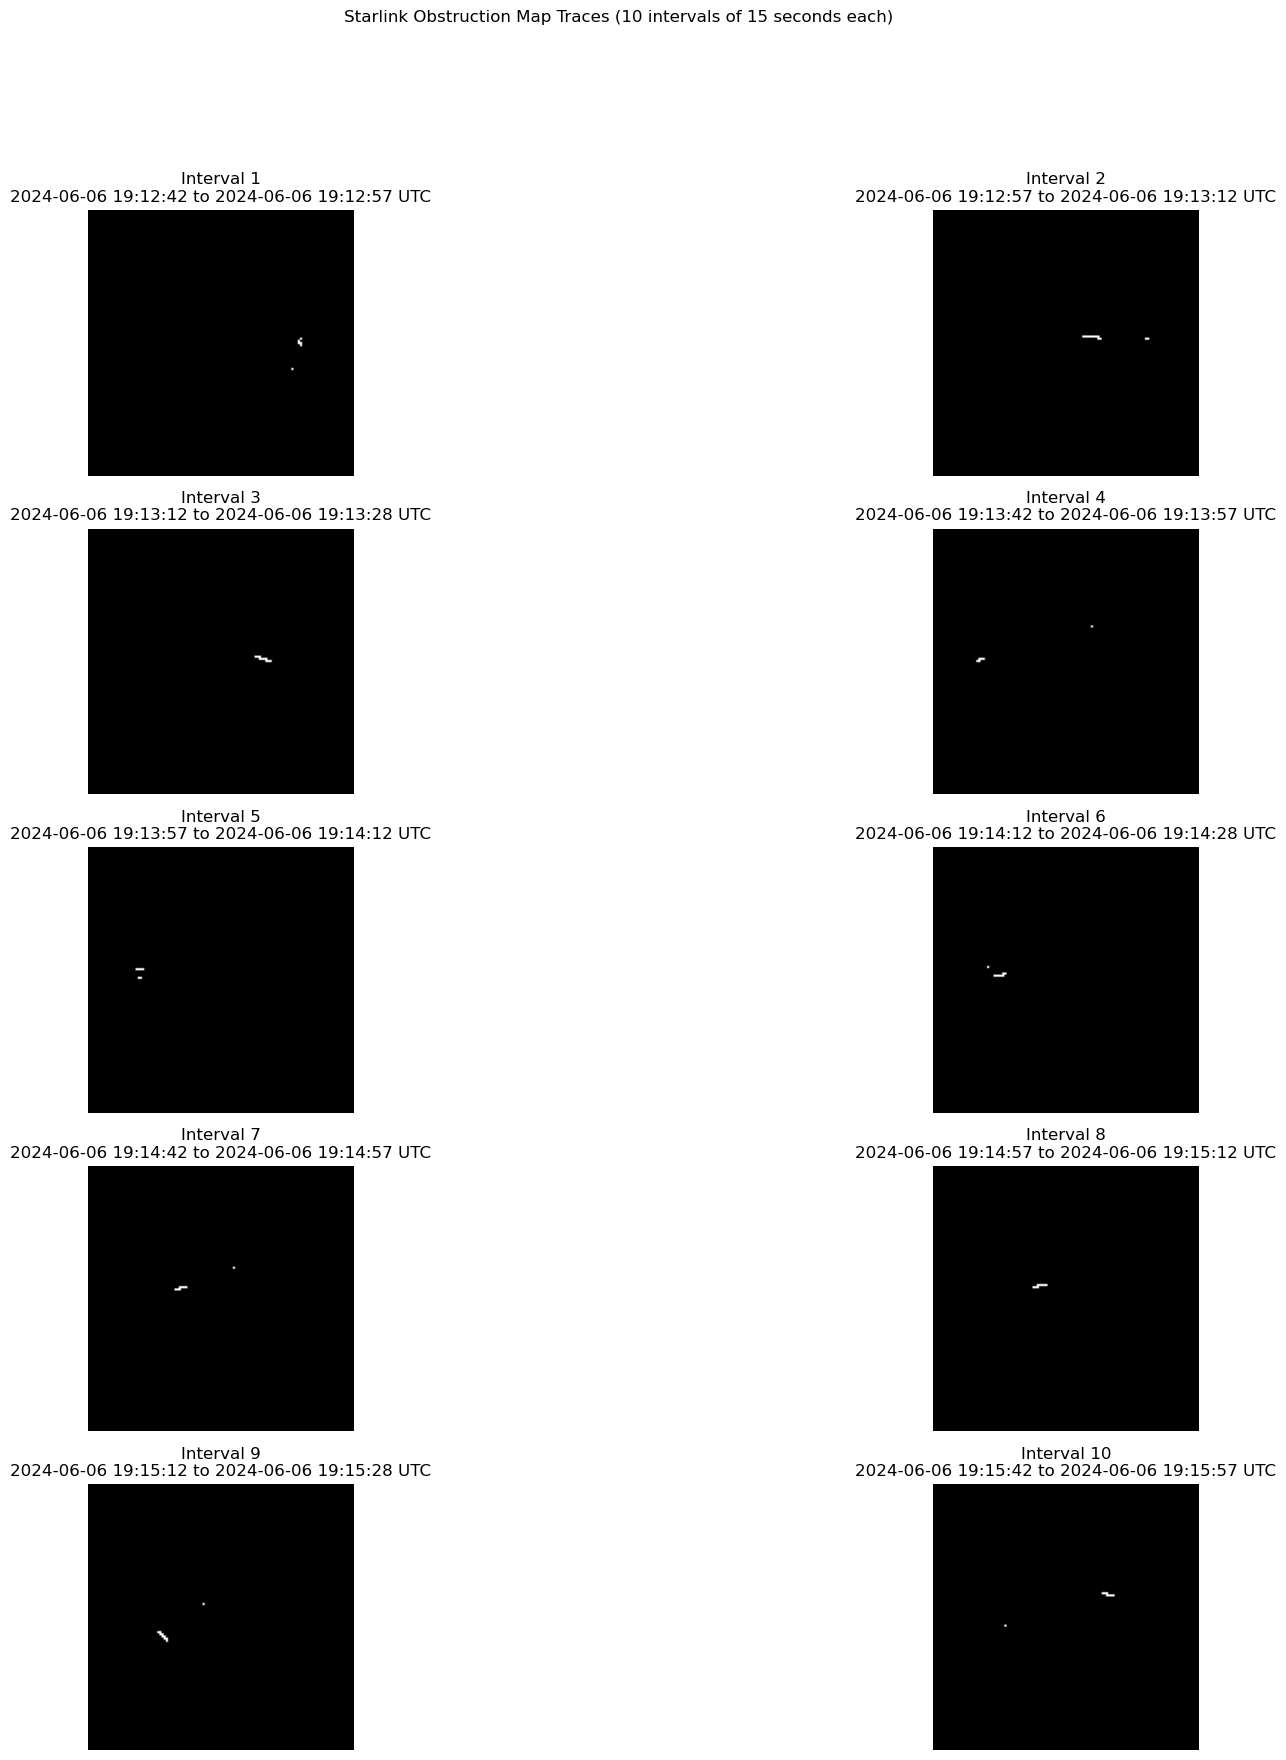

In [32]:
import sys
import os
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:\\SatInView\\starlink-grpc-tools-main'))

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_traces(all_snapshots, start_times, end_times):
    plt.figure(figsize=(20, 20))
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(5, 2, i + 1)  # Arrange plots in a 5x2 grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (10 intervals of 15 seconds each)')
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

all_snapshots = []
start_times = []
end_times = []

for _ in range(10):
    wait_until_target_time()

    starlink_grpc.reset_obstruction_map(context)
    duration_seconds = 15
    interval_seconds = 1  # Capture a snapshot every 1 second

    start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")
    snapshots = capture_snr_data(duration_seconds, interval_seconds, context)
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

# Plot all the traces
plot_snr_traces(all_snapshots, start_times, end_times)


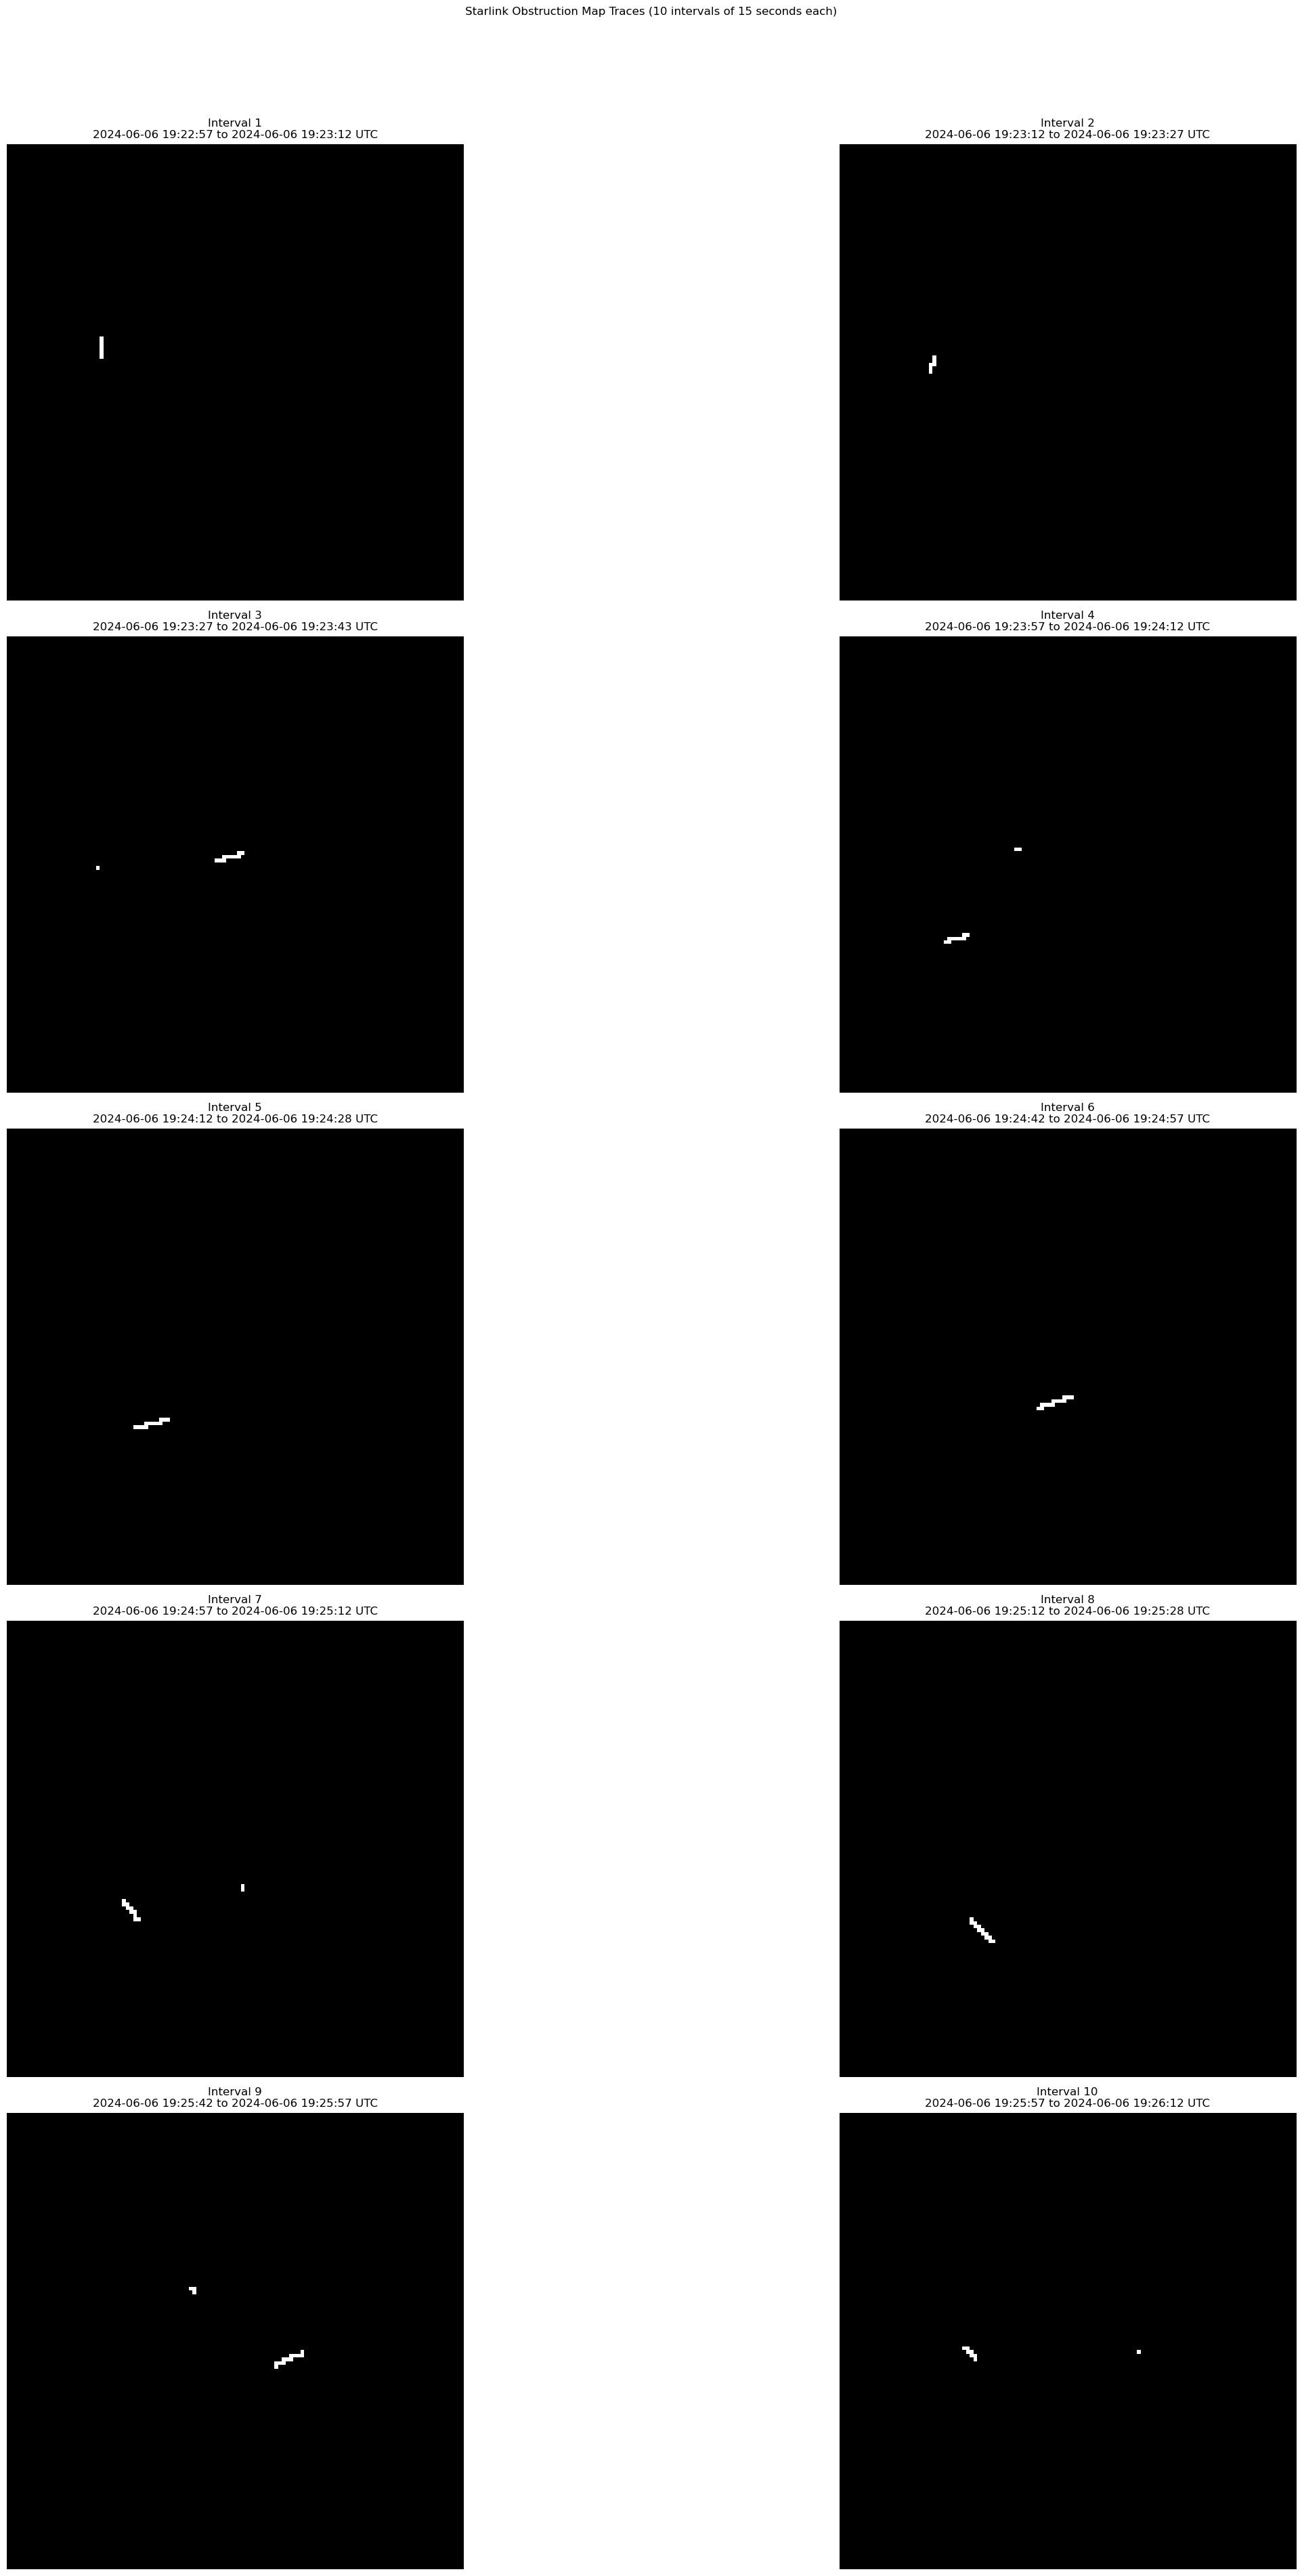

In [38]:
import sys
import os
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:\\SatInView\\starlink-grpc-tools-main'))

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_traces(all_snapshots, start_times, end_times):
    plt.figure(figsize=(30, 40))  # Increase the figure size for better resolution
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(5, 2, i + 1)  # Arrange plots in a 5x2 grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (10 intervals of 15 seconds each)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the main title
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

all_snapshots = []
start_times = []
end_times = []

for _ in range(10):
    wait_until_target_time()

    starlink_grpc.reset_obstruction_map(context)
    duration_seconds = 15
    interval_seconds = 1  # Capture a snapshot every 1 second

    start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")
    snapshots = capture_snr_data(duration_seconds, interval_seconds, context)
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

# Plot all the traces
plot_snr_traces(all_snapshots, start_times, end_times)
